In [1]:
# ARIMA-CNN-LSTM Hybrid Model for Stock Index Prediction
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.arima.model import ARIMA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Bidirectional, Dropout, Dense
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("aapl_2025.csv")
close_prices = data['Close'].dropna()

In [3]:
# 🔁 Fit ARIMA Model
arima_model = ARIMA(close_prices, order=(5, 1, 4))
arima_result = arima_model.fit()
residuals = arima_result.resid

U:\Projects_Umesh\Ann\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
U:\Projects_Umesh\Ann\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [4]:
# 📊 Normalize Residuals
scaler = MinMaxScaler()
scaled_residuals = scaler.fit_transform(residuals.values.reshape(-1, 1))


In [6]:
def create_sequences(data, window_size=60):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i - window_size:i])
        y.append(data[i])
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_residuals)
X = X.reshape((X.shape[0], X.shape[1], 1))

In [7]:
# 🧠 Build CNN-LSTM Model
model = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(X.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(64, kernel_size=5, activation='relu'),
    MaxPooling1D(pool_size=2),
    Conv1D(128, kernel_size=5, activation='relu'),
    MaxPooling1D(pool_size=2),
    Bidirectional(LSTM(50)),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

In [8]:
# 🏋️ Train Model
history = model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/10

47/47 [==============================] - 17s 87ms/step - loss: 0.0070 - val_loss: 0.0067
Epoch 2/10
47/47 [==============================] - 1s 30ms/step - loss: 0.0017 - val_loss: 0.0065
Epoch 3/10
47/47 [==============================] - 1s 23ms/step - loss: 0.0016 - val_loss: 0.0060
Epoch 4/10
47/47 [==============================] - 1s 21ms/step - loss: 0.0015 - val_loss: 0.0060
Epoch 5/10
47/47 [==============================] - 1s 25ms/step - loss: 0.0015 - val_loss: 0.0065
Epoch 6/10
47/47 [==============================] - 1s 25ms/step - loss: 0.0015 - val_loss: 0.0060
Epoch 7/10
47/47 [==============================] - 1s 26ms/step - loss: 0.0015 - val_loss: 0.0063
Epoch 8/10
47/47 [==============================] - 1s 26ms/step - loss: 0.0015 - val_loss: 0.0061
Epoch 9/10
47/47 [==============================] - 1s 31ms/step - loss: 0.0017 - val_loss: 0.0060
Epoch 10/10
47/47 [==============================] - 1s 29ms/step - loss: 0.0014 - val_loss: 0.0059


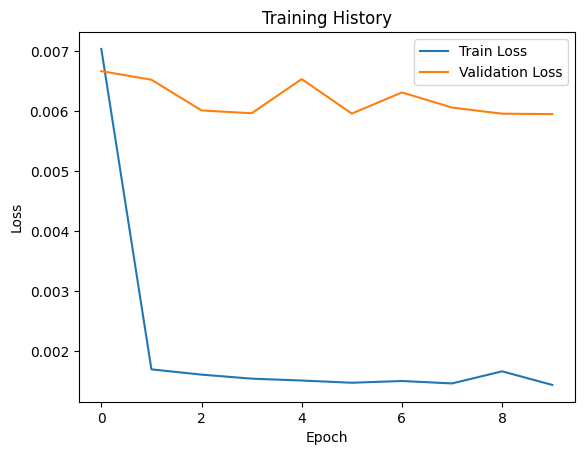

In [9]:
# 📈 Plot Training History
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [10]:
# ✅ Predict and Invert Scaling (Optional)
y_pred = model.predict(X)
y_pred_inverted = scaler.inverse_transform(y_pred)
y_true_inverted = scaler.inverse_transform(y)


59/59 [==============================] - 3s 10ms/step


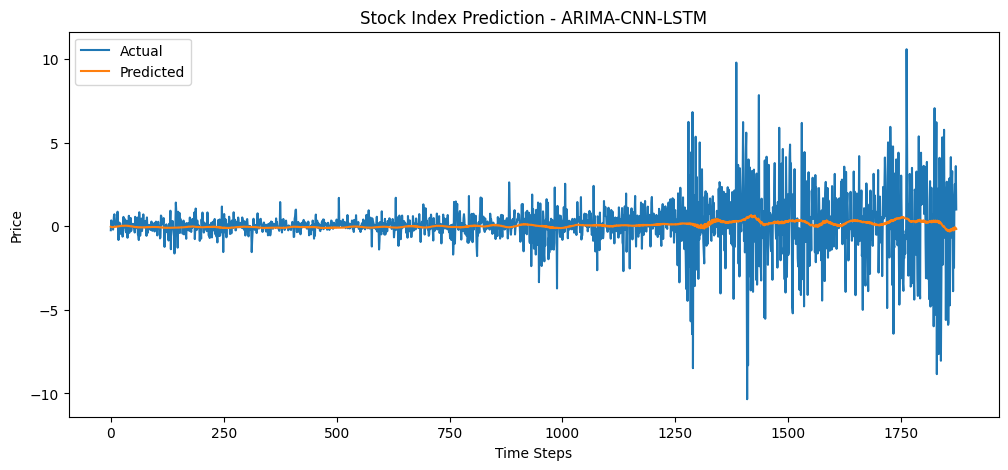

In [11]:
plt.figure(figsize=(12, 5))
plt.plot(y_true_inverted, label='Actual')
plt.plot(y_pred_inverted, label='Predicted')
plt.title('Stock Index Prediction - ARIMA-CNN-LSTM')
plt.xlabel('Time Steps')
plt.ylabel('Price')
plt.legend()
plt.show()

In [12]:
# 📊 Evaluation Metrics
mse = mean_squared_error(y_true_inverted, y_pred_inverted)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true_inverted, y_pred_inverted)

print("Evaluation Metrics:")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")


Evaluation Metrics:
MSE: 2.5307
RMSE: 1.5908
MAE: 0.9262


In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.arima.model import ARIMA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dropout, Dense, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
try:
    data = pd.read_csv("aapl_2025.csv")
except FileNotFoundError:
    print("Error: 'aapl_2025.csv' not found. Please ensure the file is in the correct directory.")
    # Create a dummy dataframe to prevent script from crashing
    data = pd.DataFrame({'Close': np.random.rand(1000) * 100 + 100})

close_prices = data['Close'].dropna()


In [3]:
print("Fitting ARIMA model...")
arima_model = ARIMA(close_prices, order=(5, 1, 4))
arima_result = arima_model.fit()
residuals = arima_result.resid
print("ARIMA fitting complete.")

Fitting ARIMA model...


U:\Projects_Umesh\Ann\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
U:\Projects_Umesh\Ann\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA fitting complete.


In [4]:
# Scale the residuals (non-linear component)
scaler = MinMaxScaler()
scaled_residuals = scaler.fit_transform(residuals.values.reshape(-1, 1))

# Create Sequences for the deep learning model input
def create_sequences(data, window_size=60):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i - window_size:i])
        y.append(data[i])
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_residuals)
X = X.reshape((X.shape[0], X.shape[1], 1))
# --- 2. Build a Regularized CNN-LSTM Model ---
# This model is simpler and includes several anti-overfitting techniques

# Clear any previous models from memory
from tensorflow.keras import backend as K
K.clear_session()

model = Sequential([
    # Reduced the number of filters and added L2 regularization
    Conv1D(
        filters=32,
        kernel_size=5,
        activation='relu',
        input_shape=(X.shape[1], 1),
        kernel_regularizer=l2(0.001) # L2 Regularization
    ),
    MaxPooling1D(pool_size=2),

    # A single, powerful Bidirectional LSTM layer is often sufficient
    # Added L2 regularization and recurrent_dropout
    Bidirectional(LSTM(
        50,
        activation='tanh', # Tanh is the default and often works well for LSTMs
        kernel_regularizer=l2(0.001), # L2 Regularization on input weights
        recurrent_dropout=0.2 # Dropout on recurrent connections
    )),

    # Increased the dropout rate for stronger regularization
    Dropout(0.4),

    # Final output layer
    Dense(1)
])

# Use a custom optimizer with a slightly lower learning rate
optimizer = Adam(learning_rate=0.0005)

model.compile(optimizer=optimizer, loss='mean_squared_error')

model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 56, 32)            192       
                                                                 
 max_pooling1d (MaxPooling1  (None, 28, 32)            0         
 D)                                                              
                                                                 
 bidirectional (Bidirection  (None, 100)               33200     
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 33493 (130.83 KB)
Trainable params: 3349

In [5]:
# --- 3. Train the Model with Early Stopping ---

# EarlyStopping callback will monitor 'val_loss' and stop training
# when it has not improved for 'patience' epochs.
# 'restore_best_weights=True' ensures the model weights are from the best epoch.
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10, # Number of epochs with no improvement after which training will be stopped.
    verbose=1,
    restore_best_weights=True
)

# Train the model for more epochs, letting Early Stopping find the optimal number
print("\nTraining model with Early Stopping...")
history = model.fit(
    X,
    y,
    epochs=100, # Train for more epochs; early stopping will halt it at the right time
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping], # Add the callback here
    verbose=1
)
print("Model training complete.")


Training model with Early Stopping...
Epoch 1/100

47/47 [==============================] - 21s 120ms/step - loss: 0.1082 - val_loss: 0.0830
Epoch 2/100
47/47 [==============================] - 4s 81ms/step - loss: 0.0665 - val_loss: 0.0581
Epoch 3/100
47/47 [==============================] - 4s 81ms/step - loss: 0.0456 - val_loss: 0.0412
Epoch 4/100
47/47 [==============================] - 4s 78ms/step - loss: 0.0319 - val_loss: 0.0305
Epoch 5/100
47/47 [==============================] - 4s 79ms/step - loss: 0.0227 - val_loss: 0.0231
Epoch 6/100
47/47 [==============================] - 4s 80ms/step - loss: 0.0167 - val_loss: 0.0184
Epoch 7/100
47/47 [==============================] - 4s 77ms/step - loss: 0.0128 - val_loss: 0.0153
Epoch 8/100
47/47 [==============================] - 3s 74ms/step - loss: 0.0102 - val_loss: 0.0133
Epoch 9/100
47/47 [==============================] - 4s 82ms/step - loss: 0.0085 - val_loss: 0.0118
Epoch 10/100
47/47 [==============================] - 3s 7

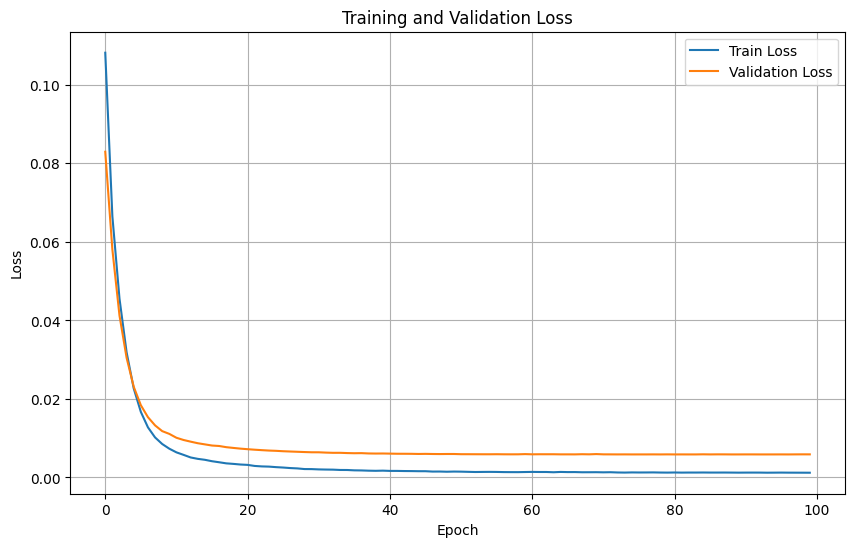

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
y_pred = model.predict(X)
y_pred_inverted = scaler.inverse_transform(y_pred)
y_true_inverted = scaler.inverse_transform(y)

59/59 [==============================] - 2s 17ms/step


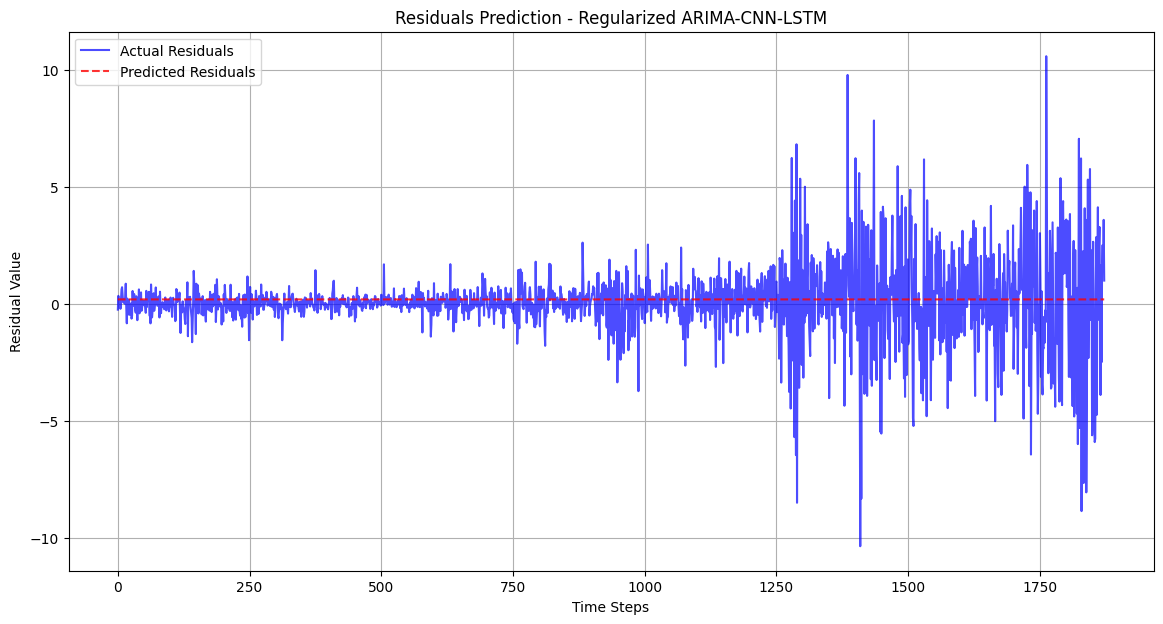

In [8]:
plt.figure(figsize=(14, 7))
plt.plot(y_true_inverted, label='Actual Residuals', color='blue', alpha=0.7)
plt.plot(y_pred_inverted, label='Predicted Residuals', color='red', linestyle='--', alpha=0.8)
plt.title('Residuals Prediction - Regularized ARIMA-CNN-LSTM')
plt.xlabel('Time Steps')
plt.ylabel('Residual Value')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
mse = mean_squared_error(y_true_inverted, y_pred_inverted)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true_inverted, y_pred_inverted)

print("\n--- Evaluation Metrics ---")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")


--- Evaluation Metrics ---
Mean Squared Error (MSE): 2.5274
Root Mean Squared Error (RMSE): 1.5898
Mean Absolute Error (MAE): 0.9348



Fitting ARIMA model...


U:\Projects_Umesh\Ann\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
U:\Projects_Umesh\Ann\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
U:\Projects_Umesh\Ann\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
U:\Projects_Umesh\Ann\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'

ARIMA fitting complete.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 56, 32)            192       
                                                                 
 max_pooling1d (MaxPooling1  (None, 28, 32)            0         
 D)                                                              
                                                                 
 bidirectional (Bidirection  (None, 100)               33200     
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 33493 (130.83 KB

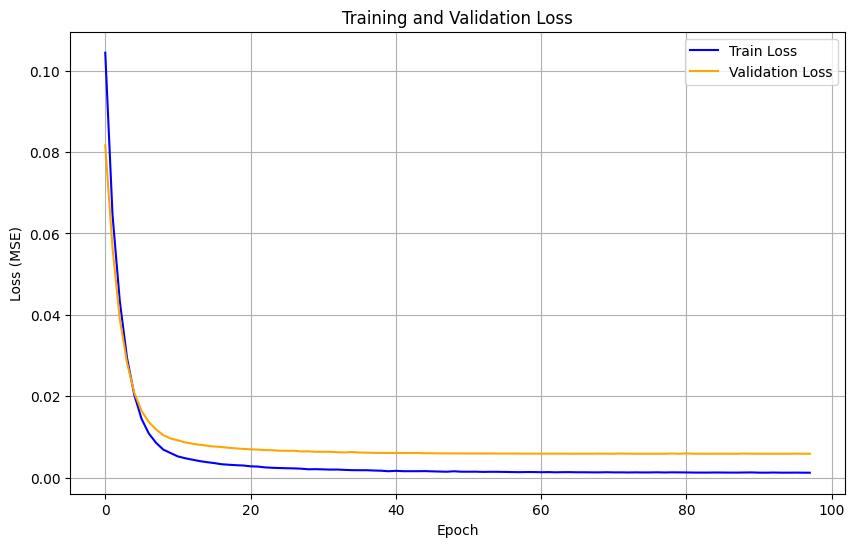

59/59 [==============================] - 6s 17ms/step


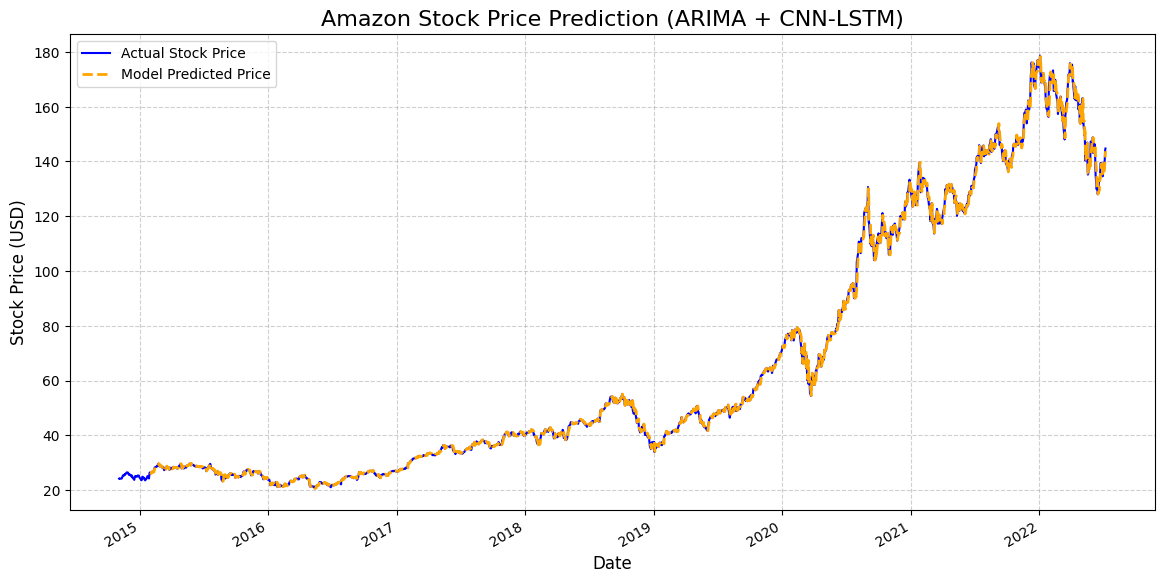


--- Evaluation Metrics ---
Mean Squared Error (MSE): 2.5124
Root Mean Squared Error (RMSE): 1.5850
Mean Absolute Error (MAE): 0.9185


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dropout, Dense, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K

# --- 1. Load Data ---
try:
    data = pd.read_csv("aapl_2025.csv", parse_dates=['Date'], index_col='Date')
except FileNotFoundError:
    print("Error: 'aapl_2025.csv' not found. Creating dummy data...")
    date_range = pd.date_range(start='2013-01-01', periods=2500, freq='B')
    data = pd.DataFrame({'Close': np.random.rand(2500) * 100 + 100}, index=date_range)

close_prices = data['Close'].dropna()


# --- 2. Fit ARIMA model for trend ---
print("Fitting ARIMA model...")
arima_model = ARIMA(close_prices, order=(5, 1, 4))
arima_result = arima_model.fit()
print("ARIMA fitting complete.")

# --- 3. Prepare residuals for deep learning ---
residuals = arima_result.resid
scaler = MinMaxScaler()
scaled_residuals = scaler.fit_transform(residuals.values.reshape(-1, 1))

def create_sequences(data, window_size=60):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i - window_size:i])
        y.append(data[i])
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_residuals)
X = X.reshape((X.shape[0], X.shape[1], 1))

# --- 4. Build CNN-LSTM Model ---
K.clear_session()
model = Sequential([
    Conv1D(32, kernel_size=5, activation='relu', input_shape=(X.shape[1], 1), kernel_regularizer=l2(0.001)),
    MaxPooling1D(pool_size=2),
    Bidirectional(LSTM(50, activation='tanh', kernel_regularizer=l2(0.001), recurrent_dropout=0.2)),
    Dropout(0.4),
    Dense(1)
])
model.compile(optimizer=Adam(learning_rate=0.0005), loss='mean_squared_error')
model.summary()

# --- 5. Train Model with EarlyStopping ---
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
print("\nTraining model...")
history = model.fit(X, y, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=1)
print("Training complete.")

# --- 6. Plot Training Loss ---
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()

# --- 7. Predict Residuals and Reconstruct Prices ---
y_pred = model.predict(X)
y_pred_inverted = scaler.inverse_transform(y_pred)
y_true_inverted = scaler.inverse_transform(y)

# Combine ARIMA fitted values with predicted residuals to reconstruct prices
arima_fitted = arima_result.fittedvalues[-len(y_pred_inverted):]
predicted_prices = arima_fitted + y_pred_inverted.flatten()
true_prices = close_prices[-len(y_pred_inverted):].values
plot_dates = close_prices.index[-len(y_pred_inverted):]

# --- 8. Plot Final Results ---
plt.figure(figsize=(14, 7))
plt.plot(close_prices.index, close_prices.values, label='Actual Stock Price', color='blue', linewidth=1.5)
plt.plot(plot_dates, predicted_prices, label='Model Predicted Price', color='orange', linestyle='--', linewidth=2)

# Yearly ticks on X-axis
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gcf().autofmt_xdate()

plt.title('Amazon Stock Price Prediction (ARIMA + CNN-LSTM)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Stock Price (USD)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# --- 9. Evaluation Metrics ---
mse = mean_squared_error(true_prices, predicted_prices)
rmse = np.sqrt(mse)
mae = mean_absolute_error(true_prices, predicted_prices)

print("\n--- Evaluation Metrics ---")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

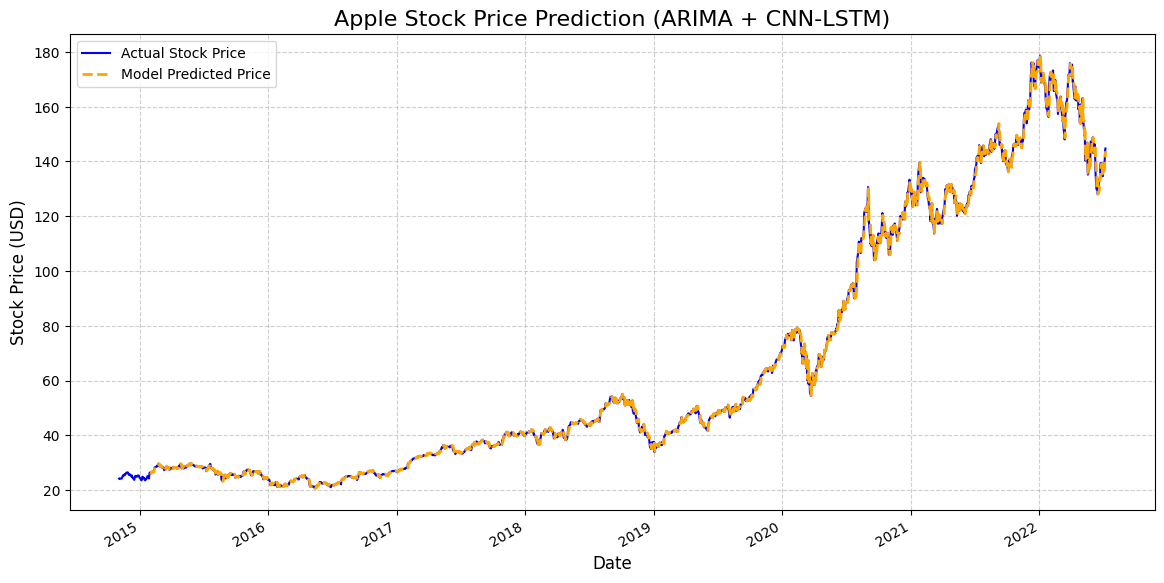

In [2]:
# --- 8. Plot Final Results ---
plt.figure(figsize=(14, 7))
plt.plot(close_prices.index, close_prices.values, label='Actual Stock Price', color='blue', linewidth=1.5)
plt.plot(plot_dates, predicted_prices, label='Model Predicted Price', color='orange', linestyle='--', linewidth=2)

# Yearly ticks on X-axis
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gcf().autofmt_xdate()

plt.title('Apple Stock Price Prediction (ARIMA + CNN-LSTM)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Stock Price (USD)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()